# Pre-Processing Dataset

# Load and Clean Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [2]:
import time
import os
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, label_binarize
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# Define Features of Interest

In [3]:
req_cols = [' Destination Port',' Flow Duration',' Total Fwd Packets',' Total Backward Packets','Total Length of Fwd Packets',' Total Length of Bwd Packets',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Fwd Packet Length Std','Bwd Packet Length Max',' Bwd Packet Length Min',' Bwd Packet Length Mean',' Bwd Packet Length Std','Flow Bytes/s',' Flow Packets/s',' Flow IAT Mean',' Flow IAT Std',' Flow IAT Max',' Flow IAT Min','Fwd IAT Total',' Fwd IAT Mean',' Fwd IAT Std',' Fwd IAT Max',' Fwd IAT Min','Bwd IAT Total',' Bwd IAT Mean',' Bwd IAT Std',' Bwd IAT Max',' Bwd IAT Min','Fwd PSH Flags',' Bwd PSH Flags',' Fwd URG Flags',' Bwd URG Flags',' Fwd Header Length',' Bwd Header Length','Fwd Packets/s',' Bwd Packets/s',' Min Packet Length',' Max Packet Length',' Packet Length Mean',' Packet Length Std',' Packet Length Variance','FIN Flag Count',' SYN Flag Count',' RST Flag Count',' PSH Flag Count',' ACK Flag Count',' URG Flag Count',' CWE Flag Count',' ECE Flag Count',' Down/Up Ratio',' Average Packet Size',' Avg Fwd Segment Size',' Avg Bwd Segment Size',' Fwd Header Length','Fwd Avg Bytes/Bulk',' Fwd Avg Packets/Bulk',' Fwd Avg Bulk Rate',' Bwd Avg Bytes/Bulk',' Bwd Avg Packets/Bulk','Bwd Avg Bulk Rate','Subflow Fwd Packets',' Subflow Fwd Bytes',' Subflow Bwd Packets',' Subflow Bwd Bytes','Init_Win_bytes_forward',' Init_Win_bytes_backward',' act_data_pkt_fwd',' min_seg_size_forward','Active Mean',' Active Std',' Active Max',' Active Min','Idle Mean',' Idle Std',' Idle Max',' Idle Min',' Label']

# Load and Inspect the Dataset

In [4]:
fraction = 1

df0 = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/XAI IDS Architecture/Datasets/CIC-IDS-2017/Wednesday-workingHours.pcap_ISCX.csv', usecols=req_cols).sample(frac = fraction)

df1 = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/XAI IDS Architecture/Datasets/CIC-IDS-2017/Tuesday-WorkingHours.pcap_ISCX.csv', usecols=req_cols).sample(frac = fraction)


df2 = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/XAI IDS Architecture/Datasets/CIC-IDS-2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', encoding='ISO-8859-1', usecols=req_cols).sample(frac = fraction)


df3 = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/XAI IDS Architecture/Datasets/CIC-IDS-2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv', usecols=req_cols).sample(frac = fraction)


df4 = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/XAI IDS Architecture/Datasets/CIC-IDS-2017/Monday-WorkingHours.pcap_ISCX.csv', usecols=req_cols).sample(frac = fraction)


df5 = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/XAI IDS Architecture/Datasets/CIC-IDS-2017/Friday-WorkingHours-Morning.pcap_ISCX.csv', usecols=req_cols).sample(frac = fraction)


df6 = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/XAI IDS Architecture/Datasets/CIC-IDS-2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', usecols=req_cols).sample(frac = fraction)


df7 = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/XAI IDS Architecture/Datasets/CIC-IDS-2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', usecols=req_cols).sample(frac = fraction)


frames = [df0, df1, df2, df3, df4, df5,df6, df7]

df = pd.concat(frames,ignore_index=True)

df = df.sample(frac=1)  # Shuffle dataset

df.columns = df.columns.str.strip()


<ipython-input-4-fdef386a192d>:8: DtypeWarning: Columns (84) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/XAI IDS Architecture/Datasets/CIC-IDS-2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', encoding='ISO-8859-1', usecols=req_cols).sample(frac = fraction)


# Fix Corrupt Labels

In [5]:
# **🔹 Fix Corrupted Labels (Web Attack Variants)**
label_mapping = {
    "Web Attack � Sql Injection": "Web Attack",
    "Web Attack � Brute Force": "Web Attack",
    "Web Attack � XSS": "Web Attack",
    "Web Attack   Sql Injection": "Web Attack",
    "Web Attack   Brute Force": "Web Attack",
    "Web Attack   XSS": "Web Attack",
    "Web Attack - Sql Injection": "Web Attack",
    "Web Attack - Brute Force": "Web Attack",
    "Web Attack - XSS": "Web Attack",
    "Web Attack \x96 Sql Injection": "Web Attack",
    "Web Attack \x96 Brute Force": "Web Attack",
    "Web Attack \x96 XSS": "Web Attack"
}

df["Label"] = df["Label"].replace(label_mapping)
print("Unique labels in the dataset after cleaning:")
print(df["Label"].unique())

Unique labels in the dataset after cleaning:
['BENIGN' 'DoS Hulk' nan 'PortScan' 'DDoS' 'DoS slowloris'
 'DoS Slowhttptest' 'FTP-Patator' 'SSH-Patator' 'DoS GoldenEye'
 'Web Attack' 'Bot' 'Heartbleed' 'Infiltration']


In [6]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1654493,389.0,92.0,3.0,1.0,114.0,6.0,57.0,0.0,38.000000,32.908965,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1403628,53.0,45302725.0,2.0,2.0,107.0,284.0,64.0,43.0,53.500000,14.849242,...,20.0,23809.0,0.0,23809.0,23809.0,45200000.0,0.0,45200000.0,45200000.0,BENIGN
399838,80.0,99144829.0,6.0,6.0,377.0,11595.0,359.0,0.0,62.833333,145.121214,...,20.0,13979.0,0.0,13979.0,13979.0,99000000.0,0.0,99000000.0,99000000.0,DoS Hulk
2205851,53.0,30551.0,1.0,1.0,54.0,125.0,54.0,54.0,54.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1182825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Normalization

In [7]:
df_max_scaled = df.copy()

# Remove label temporarily for normalization
df_max_scaled.pop('Label')

# Apply Min-Max Scaling (Feature Normalization)
for col in df_max_scaled.columns:
    max_val = abs(df_max_scaled[col].max())
    if max_val > 0:  # Avoid division by zero
        df_max_scaled[col] = df_max_scaled[col] / max_val

# Reassign the label column after scaling
df = df_max_scaled.assign(Label=df["Label"])

# Fill NaN values (if any)
df = df.fillna(0)

print("Dataset normalization completed.")


# # ✅ NORMALIZE NUMERIC FEATURES
# features = [col for col in df.columns if col != "Label"]
# scaler = MinMaxScaler()
# df[features] = scaler.fit_transform(df[features])



Dataset normalization completed.


In [8]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1654493,0.005936,7.666667e-07,0.000014,0.000003,0.000009,9.153974e-09,0.002297,0.000000,0.006396,0.004618,...,0.231884,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
1403628,0.000809,3.775227e-01,0.000009,0.000007,0.000008,4.332881e-07,0.002579,0.018495,0.009005,0.002084,...,0.144928,0.000216,0.0,0.000216,0.000216,0.376667,0.0,0.376667,0.376667,BENIGN
399838,0.001221,8.262069e-01,0.000027,0.000021,0.000029,1.769005e-05,0.014464,0.000000,0.010576,0.020366,...,0.144928,0.000127,0.0,0.000127,0.000127,0.825000,0.0,0.825000,0.825000,DoS Hulk
2205851,0.000809,2.545917e-04,0.000005,0.000003,0.000004,1.907078e-07,0.002176,0.023226,0.009090,0.000000,...,0.144928,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
1182825,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0


# Count and Remove Duplicates

In [9]:
print("Class distribution before duplicate removal:\n", Counter(df["Label"]))

# ✅ REMOVE DUPLICATE ROWS
df = df.drop_duplicates()

Class distribution before duplicate removal:
 Counter({'BENIGN': 2273097, 0: 288602, 'DoS Hulk': 231073, 'PortScan': 158930, 'DDoS': 128027, 'DoS GoldenEye': 10293, 'FTP-Patator': 7938, 'SSH-Patator': 5897, 'DoS slowloris': 5796, 'DoS Slowhttptest': 5499, 'Web Attack': 2180, 'Bot': 1966, 'Infiltration': 36, 'Heartbleed': 11})


In [10]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1654493,0.005936,7.666667e-07,0.000014,0.000003,0.000009,9.153974e-09,0.002297,0.000000,0.006396,0.004618,...,0.231884,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
1403628,0.000809,3.775227e-01,0.000009,0.000007,0.000008,4.332881e-07,0.002579,0.018495,0.009005,0.002084,...,0.144928,0.000216,0.0,0.000216,0.000216,0.376667,0.0,0.376667,0.376667,BENIGN
399838,0.001221,8.262069e-01,0.000027,0.000021,0.000029,1.769005e-05,0.014464,0.000000,0.010576,0.020366,...,0.144928,0.000127,0.0,0.000127,0.000127,0.825000,0.0,0.825000,0.825000,DoS Hulk
2205851,0.000809,2.545917e-04,0.000005,0.000003,0.000004,1.907078e-07,0.002176,0.023226,0.009090,0.000000,...,0.144928,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
1182825,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0


# Encode Labels

In [11]:
import joblib
from sklearn.preprocessing import LabelEncoder

print("Unique labels before encoding:", df["Label"].unique())

df["Label"] = df["Label"].astype(str).str.strip()

df = df[~df["Label"].str.match(r'^\d+$')]

label_encoder = LabelEncoder()
df["Label"] = label_encoder.fit_transform(df["Label"])


encoder_path = "/content/drive/MyDrive/Colab Notebooks/XAI IDS Architecture/2_Modeling-Phase/train_and_test_datasets/CICIDS-2017/label_encoder.pkl"
joblib.dump(label_encoder, encoder_path)

print(f"LabelEncoder saved at: {encoder_path}")


print("Correctly Encoded Labels:", label_encoder.classes_)

Unique labels before encoding: ['BENIGN' 'DoS Hulk' 0 'PortScan' 'DDoS' 'DoS slowloris'
 'DoS Slowhttptest' 'FTP-Patator' 'SSH-Patator' 'DoS GoldenEye'
 'Web Attack' 'Bot' 'Heartbleed' 'Infiltration']
LabelEncoder saved at: /content/drive/MyDrive/Colab Notebooks/XAI IDS Architecture/2_Modeling-Phase/train_and_test_datasets/CICIDS-2017/label_encoder.pkl
Correctly Encoded Labels: ['BENIGN' 'Bot' 'DDoS' 'DoS GoldenEye' 'DoS Hulk' 'DoS Slowhttptest'
 'DoS slowloris' 'FTP-Patator' 'Heartbleed' 'Infiltration' 'PortScan'
 'SSH-Patator' 'Web Attack']


In [12]:
actual_class_names = label_encoder.classes_
print(actual_class_names)  # This prints the actual string class names


['BENIGN' 'Bot' 'DDoS' 'DoS GoldenEye' 'DoS Hulk' 'DoS Slowhttptest'
 'DoS slowloris' 'FTP-Patator' 'Heartbleed' 'Infiltration' 'PortScan'
 'SSH-Patator' 'Web Attack']


In [13]:
import numpy as np

# Check unique labels in train and test
print("Unique labels in y_train:", np.unique(df['Label']))
# print("Unique labels in y_test:", np.unique(y_test))


Unique labels in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]


# K-Best Feature Selection

In [14]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = df.drop(columns=["Label"])
y = df["Label"]

k_best = SelectKBest(score_func=mutual_info_classif, k=15)
X_new = k_best.fit_transform(X, y)
selected_features_kbest = X.columns[k_best.get_support()].tolist()
print("Selected Features (K-Best):", selected_features_kbest)

Selected Features (K-Best): ['Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'Average Packet Size', 'Avg Bwd Segment Size', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward']


<ipython-input-38-c6d0e36f0286>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=k_best_scores["Feature"], y=k_best_scores["Score"], palette="Blues_r")


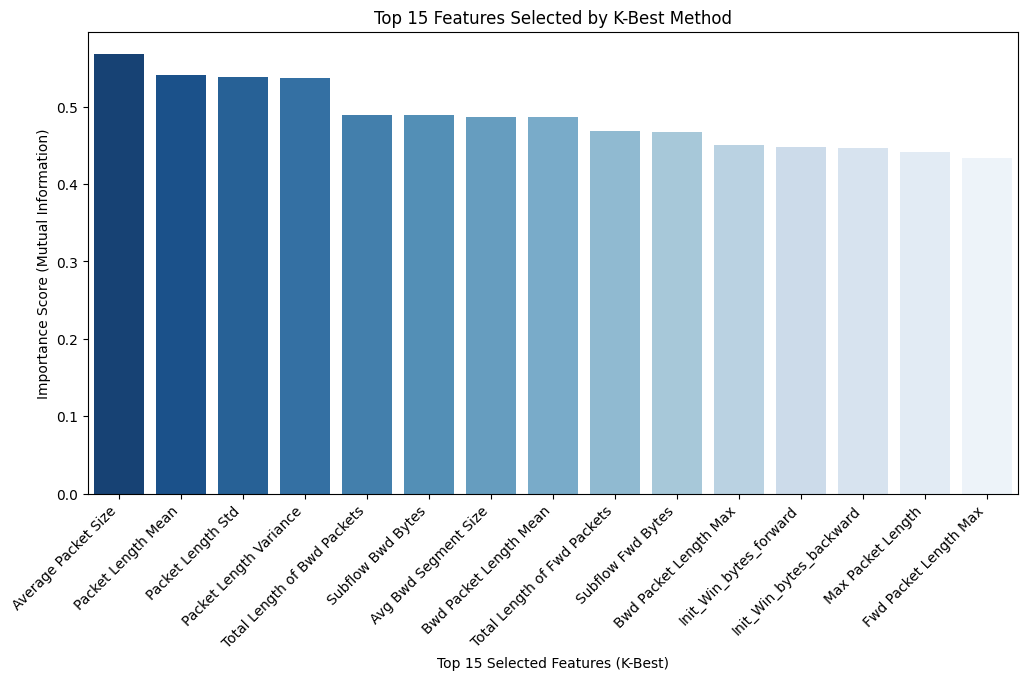

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Get Feature Scores from SelectKBest
k_best_scores = pd.DataFrame({
    "Feature": X.columns,  # All features before selection
    "Score": k_best.scores_  # K-Best scores
})

# ✅ Sort by Highest Score & Select Top 20
k_best_scores = k_best_scores.sort_values(by="Score", ascending=False)[:len(selected_features_kbest)]

# ✅ Plot Feature Importance using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=k_best_scores["Feature"], y=k_best_scores["Score"], palette="Blues_r")
plt.xticks(rotation=45, ha="right")
plt.xlabel(f"Top {len(selected_features_kbest)} Selected Features (K-Best)")
plt.ylabel("Importance Score (Mutual Information)")
plt.title(f"Top {len(selected_features_kbest)} Features Selected by K-Best Method")
plt.show()


# Information Gain using RandomForest

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X, y)
# feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
# top_features_ig = feature_importances.nlargest(15).index.tolist()
# print("Top 15 Features (Information Gain):", top_features_ig)

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # ✅ Create a DataFrame to store feature importance scores
# info_gain_scores = pd.DataFrame({
#     "Feature": X.columns,  # All features before selection
#     "Score": feature_importances  # Random Forest importance scores
# })

# info_gain_scores = info_gain_scores.sort_values(by="Score", ascending=False)[:len(top_features_ig)]

# # ✅ Plot Feature Importance using Seaborn
# plt.figure(figsize=(18, 6))
# sns.barplot(x=info_gain_scores["Feature"], y=info_gain_scores["Score"], palette="Greens_r")
# plt.xticks(rotation=45, ha="right")
# plt.xlabel(f"Top {len(top_features_ig)} Selected Features (Information Gain)")
# plt.ylabel("Feature Importance Score (Random Forest)")
# plt.title(f"Top {len(top_features_ig)} Features Selected by Information Gain Method")
# plt.show()


# Merge All Selected Features

In [ ]:
final_selected_features = list(set(selected_features_kbest))
print("Final Selected Features:", final_selected_features)

# final_selected_features = [
#     "Total Length of Fwd Packets", "Total Length of Bwd Packets",
#     "Fwd Packet Length Max", "Bwd Packet Length Max",
#     "Bwd Packet Length Mean", "Max Packet Length",
#     "Packet Length Mean", "Packet Length Std",
#     "Packet Length Variance", "Average Packet Size",
#     "Avg Bwd Segment Size", "Subflow Fwd Bytes", "Subflow Bwd Bytes"
# ]


print("✅ Number of Final Selected Features:", len(final_selected_features))

Final Selected Features: ['Total Length of Bwd Packets', 'Packet Length Std', 'Subflow Bwd Bytes', 'Fwd Packet Length Max', 'Bwd Packet Length Max', 'Total Length of Fwd Packets', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Variance', 'Init_Win_bytes_backward', 'Init_Win_bytes_forward', 'Avg Bwd Segment Size', 'Subflow Fwd Bytes', 'Bwd Packet Length Mean', 'Average Packet Size']
✅ Number of Final Selected Features: 15


# Normalize Features

In [ ]:
scaler = MinMaxScaler()
X_selected = X[final_selected_features]
X_selected = scaler.fit_transform(X_selected)

# Train-Test Split

In [ ]:
# ✅ PREPARE FEATURES AND LABELS
X = df.drop(columns=["Label"])
y = df["Label"]

# ✅ REMOVE CLASSES WITH ONLY ONE INSTANCE
class_counts = Counter(y)
valid_classes = [cls for cls, count in class_counts.items() if count > 1]
df_filtered = df[df["Label"].isin(valid_classes)]

# ✅ SPLIT DATA (STRATIFIED SPLIT TO MAINTAIN CLASS DISTRIBUTION)
X_train, X_test, y_train, y_test = train_test_split(
    df_filtered.drop(columns=["Label"]), df_filtered["Label"],
    test_size=0.30, random_state=42, stratify=df_filtered["Label"]
)

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.30, random_state=42, stratify=y
)

# ✅ CHECK IF ALL CLASSES ARE PRESENT IN BOTH SETS
print("✅ Unique values in y_train:", np.unique(y_train))
print("✅ Unique values in y_test:", np.unique(y_test))


✅ Unique values in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
✅ Unique values in y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]


# Apply SMOTE + Undersampling to Balance Classes

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Get the current class distribution
class_counts = Counter(y_train)
max_class_size = class_counts[0]  # Majority class size

# Define an adaptive oversampling strategy:
smote_strategy = {}
for cls, count in class_counts.items():
    if count < 5000:  # For extremely minority classes
        smote_strategy[cls] = min(count * 10, max_class_size // 4)
    elif count < max_class_size // 10:  # Moderate minority classes
        smote_strategy[cls] = min(count * 3, max_class_size // 3)

# Apply SMOTE only to the underrepresented classes
smote = SMOTE(sampling_strategy=smote_strategy, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("✅ Class distribution after Adaptive SMOTE:")
print(Counter(y_train_resampled))


✅ Class distribution after Adaptive SMOTE:
Counter({0: 1467647, 4: 362982, 2: 268833, 10: 190719, 7: 41530, 6: 37700, 5: 36600, 11: 22530, 3: 21600, 12: 15000, 1: 13670, 9: 250, 8: 80})


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Reduce class `0` to 500,000 instead of 1.4M
undersample_strategy = {0: 500000}  # Further reduce class 0

undersampler = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train_resampled, y_train_resampled)

print("✅ Final Class distribution after further undersampling:")
print(Counter(y_train_balanced))


✅ Final Class distribution after further undersampling:
Counter({0: 500000, 4: 362982, 2: 268833, 10: 190719, 7: 41530, 6: 37700, 5: 36600, 11: 22530, 3: 21600, 12: 15000, 1: 13670, 9: 250, 8: 80})


In [ ]:
from imblearn.over_sampling import SMOTE

# Further increase class `8` and `9` to have at least 2,000 samples
smote_minority = SMOTE(sampling_strategy={8: 2000, 9: 2000}, random_state=42)
X_train_final, y_train_final = smote_minority.fit_resample(X_train_balanced, y_train_balanced)

print("✅ Final Class Distribution After Fine-tuning:")
print(Counter(y_train_final))


✅ Final Class Distribution After Fine-tuning:
Counter({0: 500000, 4: 362982, 2: 268833, 10: 190719, 7: 41530, 6: 37700, 5: 36600, 11: 22530, 3: 21600, 12: 15000, 1: 13670, 8: 2000, 9: 2000})


# Augment Test Set (If Needed)

In [ ]:
# Define the minimum and maximum number of samples for each class in the test set
min_test_samples = 5000  # Ensure at least 2,000 samples per class
max_majority_test_samples = 300000  # Reduce class 0 to 300,000 samples

# Convert X_test back to DataFrame if needed
X_test = pd.DataFrame(X_test, columns=final_selected_features)
y_test = pd.Series(y_test)

# Adjust test set balance
test_class_counts = Counter(y_test)
test_balanced = []

for cls, count in test_class_counts.items():
    if cls == 0 and count > max_majority_test_samples:
        # Reduce majority class in test set
        sampled = df[df["Label"] == cls].sample(n=max_majority_test_samples, random_state=42)
    elif count < min_test_samples:
        # Oversample minority classes
        sampled = df[df["Label"] == cls].sample(n=min_test_samples - count, replace=True, random_state=42)
    else:
        sampled = df[df["Label"] == cls]

    test_balanced.append(sampled)

# Merge balanced test set
df_test_balanced = pd.concat(test_balanced, ignore_index=True)

# Extract X_test and y_test
X_test = df_test_balanced.drop(columns=["Label"])
y_test = df_test_balanced["Label"]

print("✅ Class distribution after ensuring at least 2,000 samples per class in testing data:")
print(Counter(y_test))


✅ Class distribution after ensuring at least 2,000 samples per class in testing data:
Counter({0: 300000, 4: 172849, 2: 128016, 10: 90819, 8: 4997, 9: 4989, 1: 4414, 12: 4357, 11: 4034, 5: 3432, 6: 3385, 7: 3220, 3: 1914})


In [ ]:
from collections import Counter

print("Class distribution in training data (after resampling):")
print(Counter(y_train_final))

print("\nClass distribution in testing data:")
print(Counter(y_test))


Class distribution in training data (after resampling):
Counter({0: 500000, 4: 362982, 2: 268833, 10: 190719, 7: 41530, 6: 37700, 5: 36600, 11: 22530, 3: 21600, 12: 15000, 1: 13670, 8: 2000, 9: 2000})

Class distribution in testing data:
Counter({0: 300000, 4: 172849, 2: 128016, 10: 90819, 8: 4997, 9: 4989, 1: 4414, 12: 4357, 11: 4034, 5: 3432, 6: 3385, 7: 3220, 3: 1914})


In [ ]:
import numpy as np

# Check unique labels in train and test
print("Unique labels in y_train:", np.unique(y_train_final))
print("Unique labels in y_test:", np.unique(y_test))


Unique labels in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Unique labels in y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]


## Save the datasets

In [ ]:
# ✅ DEFINE FILE PATHS
train_path = "/content/drive/MyDrive/Colab Notebooks/XAI IDS Architecture/2_Modeling-Phase/train_and_test_datasets/CICIDS-2017/train.csv"
test_path = "/content/drive/MyDrive/Colab Notebooks/XAI IDS Architecture/2_Modeling-Phase/train_and_test_datasets/CICIDS-2017/test.csv"

# ✅ CREATE DATAFRAMES FOR SAVING
train_df = pd.DataFrame(X_train_final, columns=final_selected_features)
train_df["Label"] = y_train_final

test_df = pd.DataFrame(X_test, columns=final_selected_features)
test_df["Label"] = y_test

# ✅ SAVE TO CSV FILES
train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)

print(f"✅ Train dataset saved to: {train_path}")
print(f"✅ Test dataset saved to: {test_path}")


✅ Train dataset saved to: /content/drive/MyDrive/Colab Notebooks/XAI IDS Architecture/2_Modeling-Phase/train_and_test_datasets/CICIDS-2017/train.csv
✅ Test dataset saved to: /content/drive/MyDrive/Colab Notebooks/XAI IDS Architecture/2_Modeling-Phase/train_and_test_datasets/CICIDS-2017/test.csv
